# Implementation of CNN and Comparision with ANN

Import the required libraies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

**Load the dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape


(60000, 28, 28)

In [3]:
np.min(X_train)

0

In [4]:
np.max(X_train)

255

Let's plot some images to see what they are

In [5]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[231])
    plt.xlabel([y[231]])

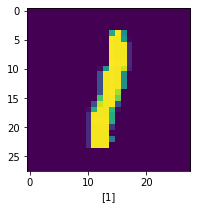

In [6]:

plot_sample(X_train, y_train, 235)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

 **Normalisation of training dataset**

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**simple artificial neural network Model for image classification**

In [8]:
X_train = tf.expand_dims(X_train, axis=-1)


In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(28,28,1)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist=ann.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4999 - accuracy: 0.8783
Epoch 2/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2513 - accuracy: 0.9295


In [13]:
history = hist.history

In [14]:
history

{'loss': [0.4999145269393921, 0.25129613280296326],
 'accuracy': [0.8782833218574524, 0.9295499920845032]}

**convolutional neural network for image classification**

In [10]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist1=cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1389 - accuracy: 0.9576
Epoch 2/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0471 - accuracy: 0.98540s


**With CNN, at the end 2 epochs, accuracy was at around 98% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy.
Also computation time is almost half as compared to ANN as maxpooling reduces the image dimensions while still preserving the features**

In [24]:
history1 = hist1.history

In [25]:
history1

{'loss': [0.13890132308006287, 0.04714057594537735],
 'accuracy': [0.9576333165168762, 0.9853833317756653]}